In [1]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.models import Sequential

2.4.0


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from numpy import array
from numpy.random import uniform
from numpy import hstack
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

In [3]:
#read_file = pd.read_csv ('Book3.csv')
read_file = pd.read_csv ('Book5.csv')
read_file.head()
dataset=read_file
dataset.head()


,Inputs,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12,10,1,1,0,0,0,4,6,0,...,0,0,0,0,0,0,0,0,0,0
3,21,10,4,4,0,1,1,0,5,0,...,0,0,0,0,0,0,0,0,0,0
4,27,12,3,3,0,8,0,5,0,2,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = dataset.iloc[:,0:-27]
X

,Inputs,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,8,0,0,0,0,0,0,0,0,0,0,1,0,8
1,7,0,0,0,0,0,0,0,0,0,0,0,0,11
2,12,10,1,1,0,0,0,4,6,0,0,0,0,2
3,21,10,4,4,0,1,1,0,5,0,2,0,0,2
4,27,12,3,3,0,8,0,5,0,2,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0,10,3,3,0,0,0,0,0,0,0,1,1,0
74,0,5,6,6,0,0,0,0,0,0,0,0,0,0
75,18,0,0,10,0,0,0,0,0,0,0,0,0,0
76,18,0,0,10,0,0,0,0,0,0,1,0,0,0


In [5]:
Y = dataset.iloc[:,15:41]
Y

,Outputs,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
74,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
76,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
in_dim = X.shape[1]
Y.shape[1]


26

In [71]:
model = Sequential()
model.add(Dense(256, input_dim=in_dim, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(Y.shape[1] , activation="softmax"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
 
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               3840      
_________________________________________________________________
dense_16 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_17 (Dense)             (None, 26)                1690      
Total params: 21,978
Trainable params: 21,978
Non-trainable params: 0
_________________________________________________________________


In [72]:
history=model.fit(X, Y, epochs=100, batch_size=10, verbose=0,  validation_split = 0.20)


In [73]:
accuracy = model.evaluate(X, Y)

3/3 [==============================] - 0s 1ms/step - loss: 0.1366 - accuracy: 0.8077


In [74]:
import matplotlib.pyplot as plt
def plot_metrics(history):
  metrics =  ['loss', 'accuracy']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(1,2,n+1)
    plt.tight_layout()
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    plt.legend()

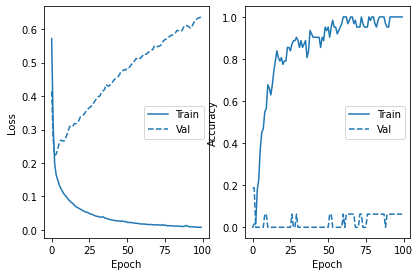

In [75]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plot_metrics(history)

In [76]:
#pip install seaborn


In [77]:
read_file1 = pd.read_csv ('Book6.csv')
read_file1.head()
dataset1=read_file1
dataset1.head()


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,y17,y18,y19,y20,y21,y22,y23,y24,y25,y26
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,5,0,6,0,0,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27,14,2,2,0,8,0,5,0,2,...,0,0,0,0,0,0,0,0,0,0
4,27,12,2,2,0,8,0,5,0,2,...,0,0,0,0,0,0,0,0,0,0


In [78]:
X_test=dataset1.iloc[:,0:-27]

In [79]:
y_test=dataset1.iloc[:,15:41]

In [80]:
y_test_predictions = model.predict_classes(X_test, batch_size=128)
baseline_results = model.evaluate(X_test, y_test,
                                  batch_size=128, verbose=0)

for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()


loss :  0.16599147021770477
accuracy :  0.692307710647583



/Users/akaash/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [81]:
y_test_predictions


array([ 0,  0,  1,  1,  1, 15,  2,  2, 14,  3,  3,  3,  4,  4,  4,  5,  5,
        5,  6,  6, 16,  7,  7,  7,  8,  8,  8,  8,  9, 12, 10, 10, 10, 11,
       11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 14, 16, 16,
       15, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 12, 10, 10, 20, 20, 20,
       12, 10, 10, 10, 10, 10, 20,  2,  2,  2])

In [82]:
y_test_predictions = model.predict_classes(X_test, batch_size=128)
baseline_results = model.evaluate(X_test, y_test,
                                  batch_size=128, verbose=0)

for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()



loss :  0.16599147021770477
accuracy :  0.692307710647583



/Users/akaash/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
